<a href="https://colab.research.google.com/github/patrycjaskowronska/UMWF/blob/main/case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('case1.csv', sep=';')
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [4]:
# duplikaty
df.duplicated().sum()

0

FLAG
0    7662
1    2179
Name: count, dtype: int64

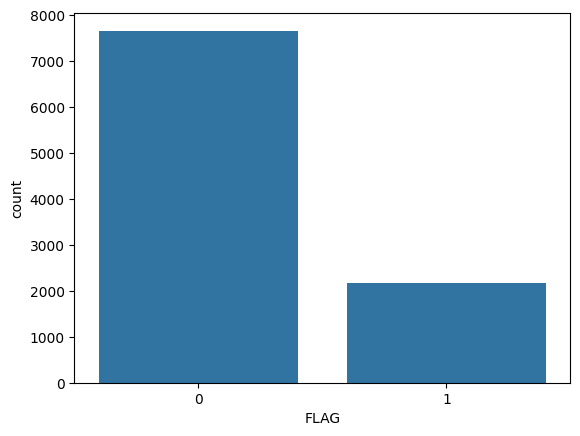

In [5]:
# rozkład wartości zmiennej FLAG
sns.countplot(data=df, x='FLAG')
df['FLAG'].value_counts()

In [6]:
# usunięcie niepotrzebnych kolumn
df = df.drop(['Unnamed: 0', 'Index', 'Address'], axis=1)
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,0.0,0.0,110,61.785995,53.070252,0.0,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.500000,

In [7]:
df.var(numeric_only=True).sort_values()

# dla 7 kolumn wariancja wynosi 0

ERC20 avg val sent contract                             0.000000e+00
ERC20 max val sent contract                             0.000000e+00
ERC20 min val sent contract                             0.000000e+00
ERC20 avg time between contract tnx                     0.000000e+00
ERC20 avg time between rec 2 tnx                        0.000000e+00
ERC20 avg time between rec tnx                          0.000000e+00
ERC20 avg time between sent tnx                         0.000000e+00
min value sent to contract                              5.080371e-08
avg value sent to contract                              1.046096e-07
total ether sent contracts                              2.660625e-07
max val sent to contract                                2.660652e-07
ERC20 uniq sent addr.1                                  4.316210e-03
FLAG                                                    1.724110e-01
ERC20 uniq sent token name                              4.536185e+01
ERC20 uniq rec token name         

In [8]:
unique_values = df['ERC20 avg time between sent tnx'].unique()
print(unique_values)
# dla kolumn z wariancją=0 występuje taka sama wartość liczbowa albo wartość pusta dlatego te kolumny zostaną usunięte

[ 0. nan]


In [9]:
df = df.drop(['ERC20 avg val sent contract',
              'ERC20 max val sent contract',
              'ERC20 min val sent contract',
              'ERC20 avg time between contract tnx',
              'ERC20 avg time between rec 2 tnx',
              'ERC20 avg time between rec tnx',
              'ERC20 avg time between sent tnx'], axis=1)
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,0.0,0.0,110,61.785995,53.070252,0.0,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.500000,0.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# wartości puste
df.isna().sum()

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

In [11]:
new_df = df.dropna()
new_df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
5,0,9900.12,375.48,20926.68,2,3,0,2,1,0.724148,4.813776,3.234908,4.166800,5.536916,4.851858,0.0,0.0,0.0,5,9.703716,9.704724,0.0,0.001008,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,2.0,1.337000e+01,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.00,1.337000e+01,6.685000,0.000000,0.000000e+00,0.000000,0.0,2.0,,Blockwell say NOTSAFU
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,0.0,0.0,110,61.785995,53.070252,0.0,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com


FLAG
0    5771
1    1350
Name: count, dtype: int64

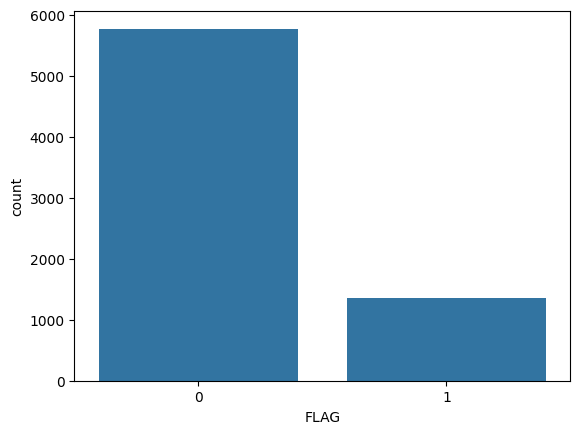

In [12]:
sns.countplot(data=new_df, x='FLAG')
new_df['FLAG'].value_counts()

# usunięcie wartości pustych spowodowałoby usunięcie ponad 2000 przykładów (i tym samym większe niezbilansowanie kolumny FLAG)

In [13]:
df.dtypes

FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                                            float64
min value sent to contract              

In [14]:
cat_columns = ['ERC20 most sent token type', 'ERC20_most_rec_token_type']

num_columns = [col for col in df.columns if col not in cat_columns]

num_columns.remove('FLAG')

print(num_columns)

['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received ', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract', 'ERC20 uniq sent addr', 'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1', 'ERC20 uniq rec contract addr', 'ERC20 min val rec', 'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent', 'ERC20 max val sent', 'ERC20 avg val sent', 'ERC20 uniq sent token name', 'ERC20 uniq rec token name']


In [15]:
df[num_columns].skew()

Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value sent to contract                              79.849427
max val se

In [16]:
# zamiast usunąć wartości psute uzupełniono je medianą (ponieważ występuje duża skośność)
df.fillna(df.median(numeric_only=True).round(1), inplace=True)
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,0.0,0.0,110,61.785995,53.070252,0.0,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.500000,0.0,0.500000,1.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,1.0,NaN,NaN


In [17]:
df.isna().sum()

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

In [18]:
# kolumny kategoryczne usunięto ponieważ występuje w nich dużo wartości pustych (w jednej ponad 2000)
df = df.drop(['ERC20 most sent token type', 'ERC20_most_rec_token_type'], axis=1)
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,0.0,0.0,110,61.785995,53.070252,0.0,-8.715743,5.0,1.503470e+03,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.500000,0.0,0.500000,1.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,1.0


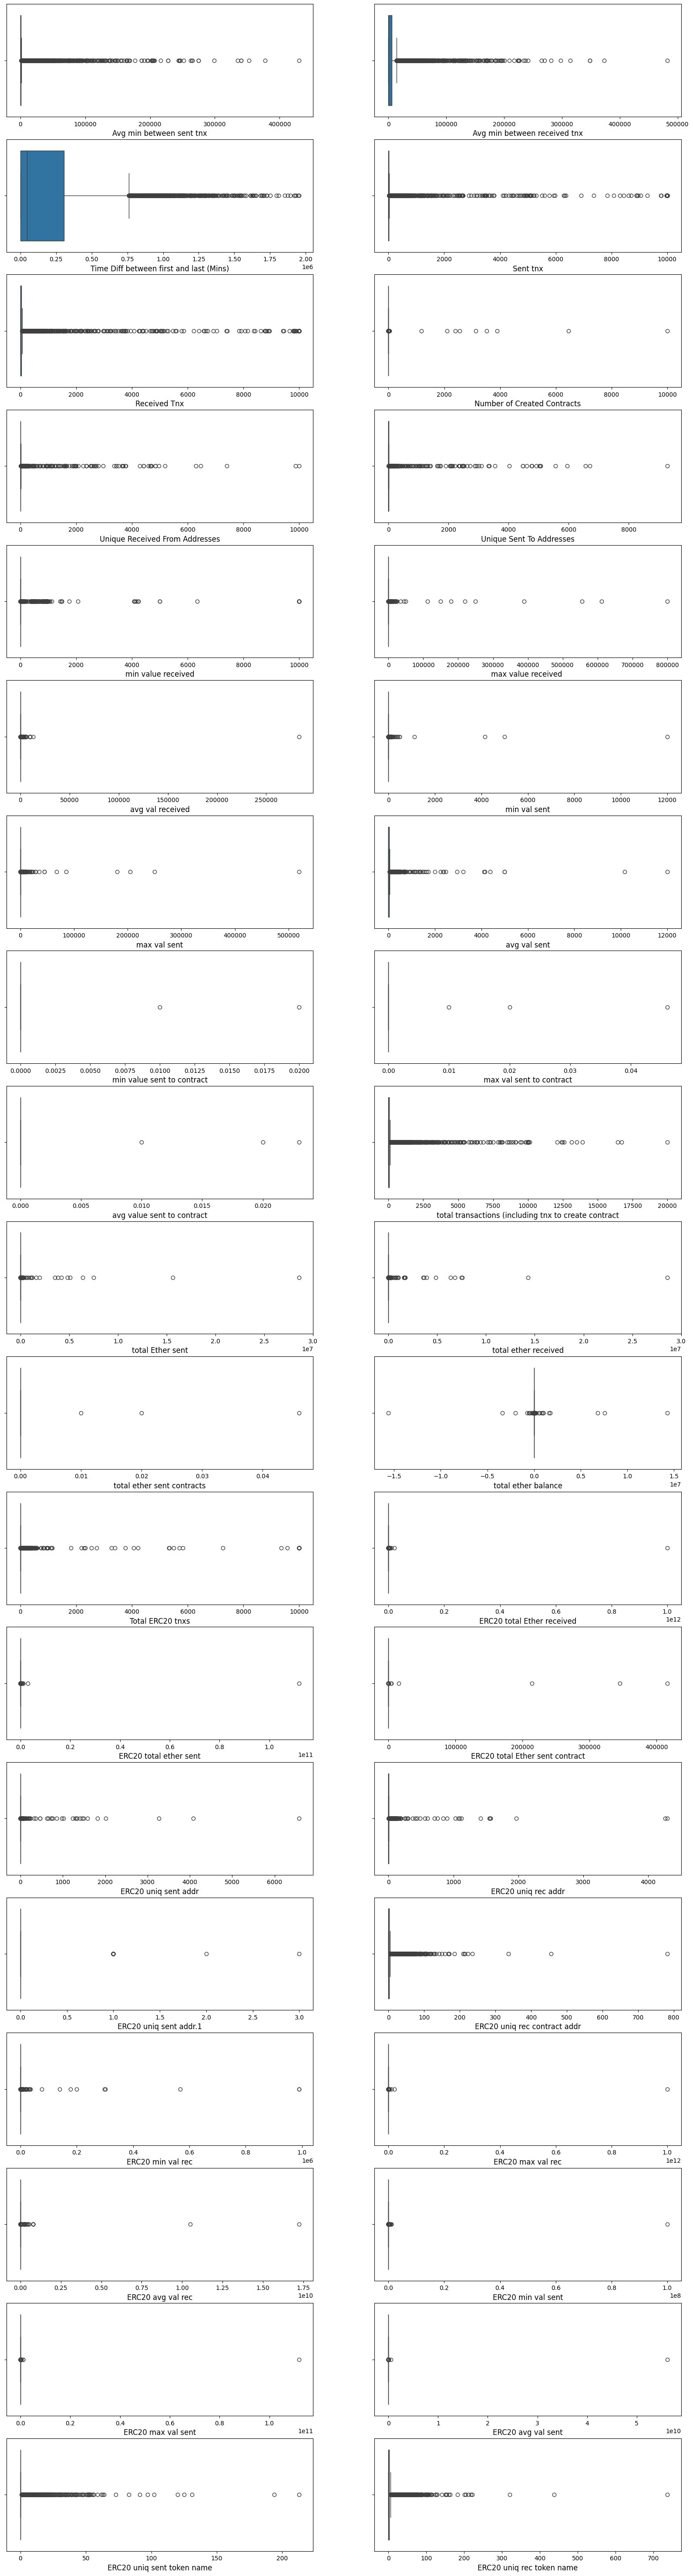

In [19]:
# wartości odstające
i = 1
plt.figure(figsize=(20,80))
for column in num_columns:
    plt.subplot(20, 2, i)
    sns.boxplot(data=df, x=column)
    plt.xlabel(column,size=12)
    i += 1

plt.show()

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# występuje bardzo dużo wartości odstających - ich usunięcie bardzo zmniejszyłoby zbiór danych, dlatego zostały zachowane

FLAG                                                    2179
Avg min between sent tnx                                2105
Avg min between received tnx                            1379
Time Diff between first and last (Mins)                  947
Sent tnx                                                1690
Received Tnx                                            1677
Number of Created Contracts                             1356
Unique Received From Addresses                          1106
Unique Sent To Addresses                                1528
min value received                                      2089
max value received                                       900
avg val received                                        1448
min val sent                                            1428
max val sent                                             916
avg val sent                                             659
min value sent to contract                                 2
max val sent to contract

<Axes: >

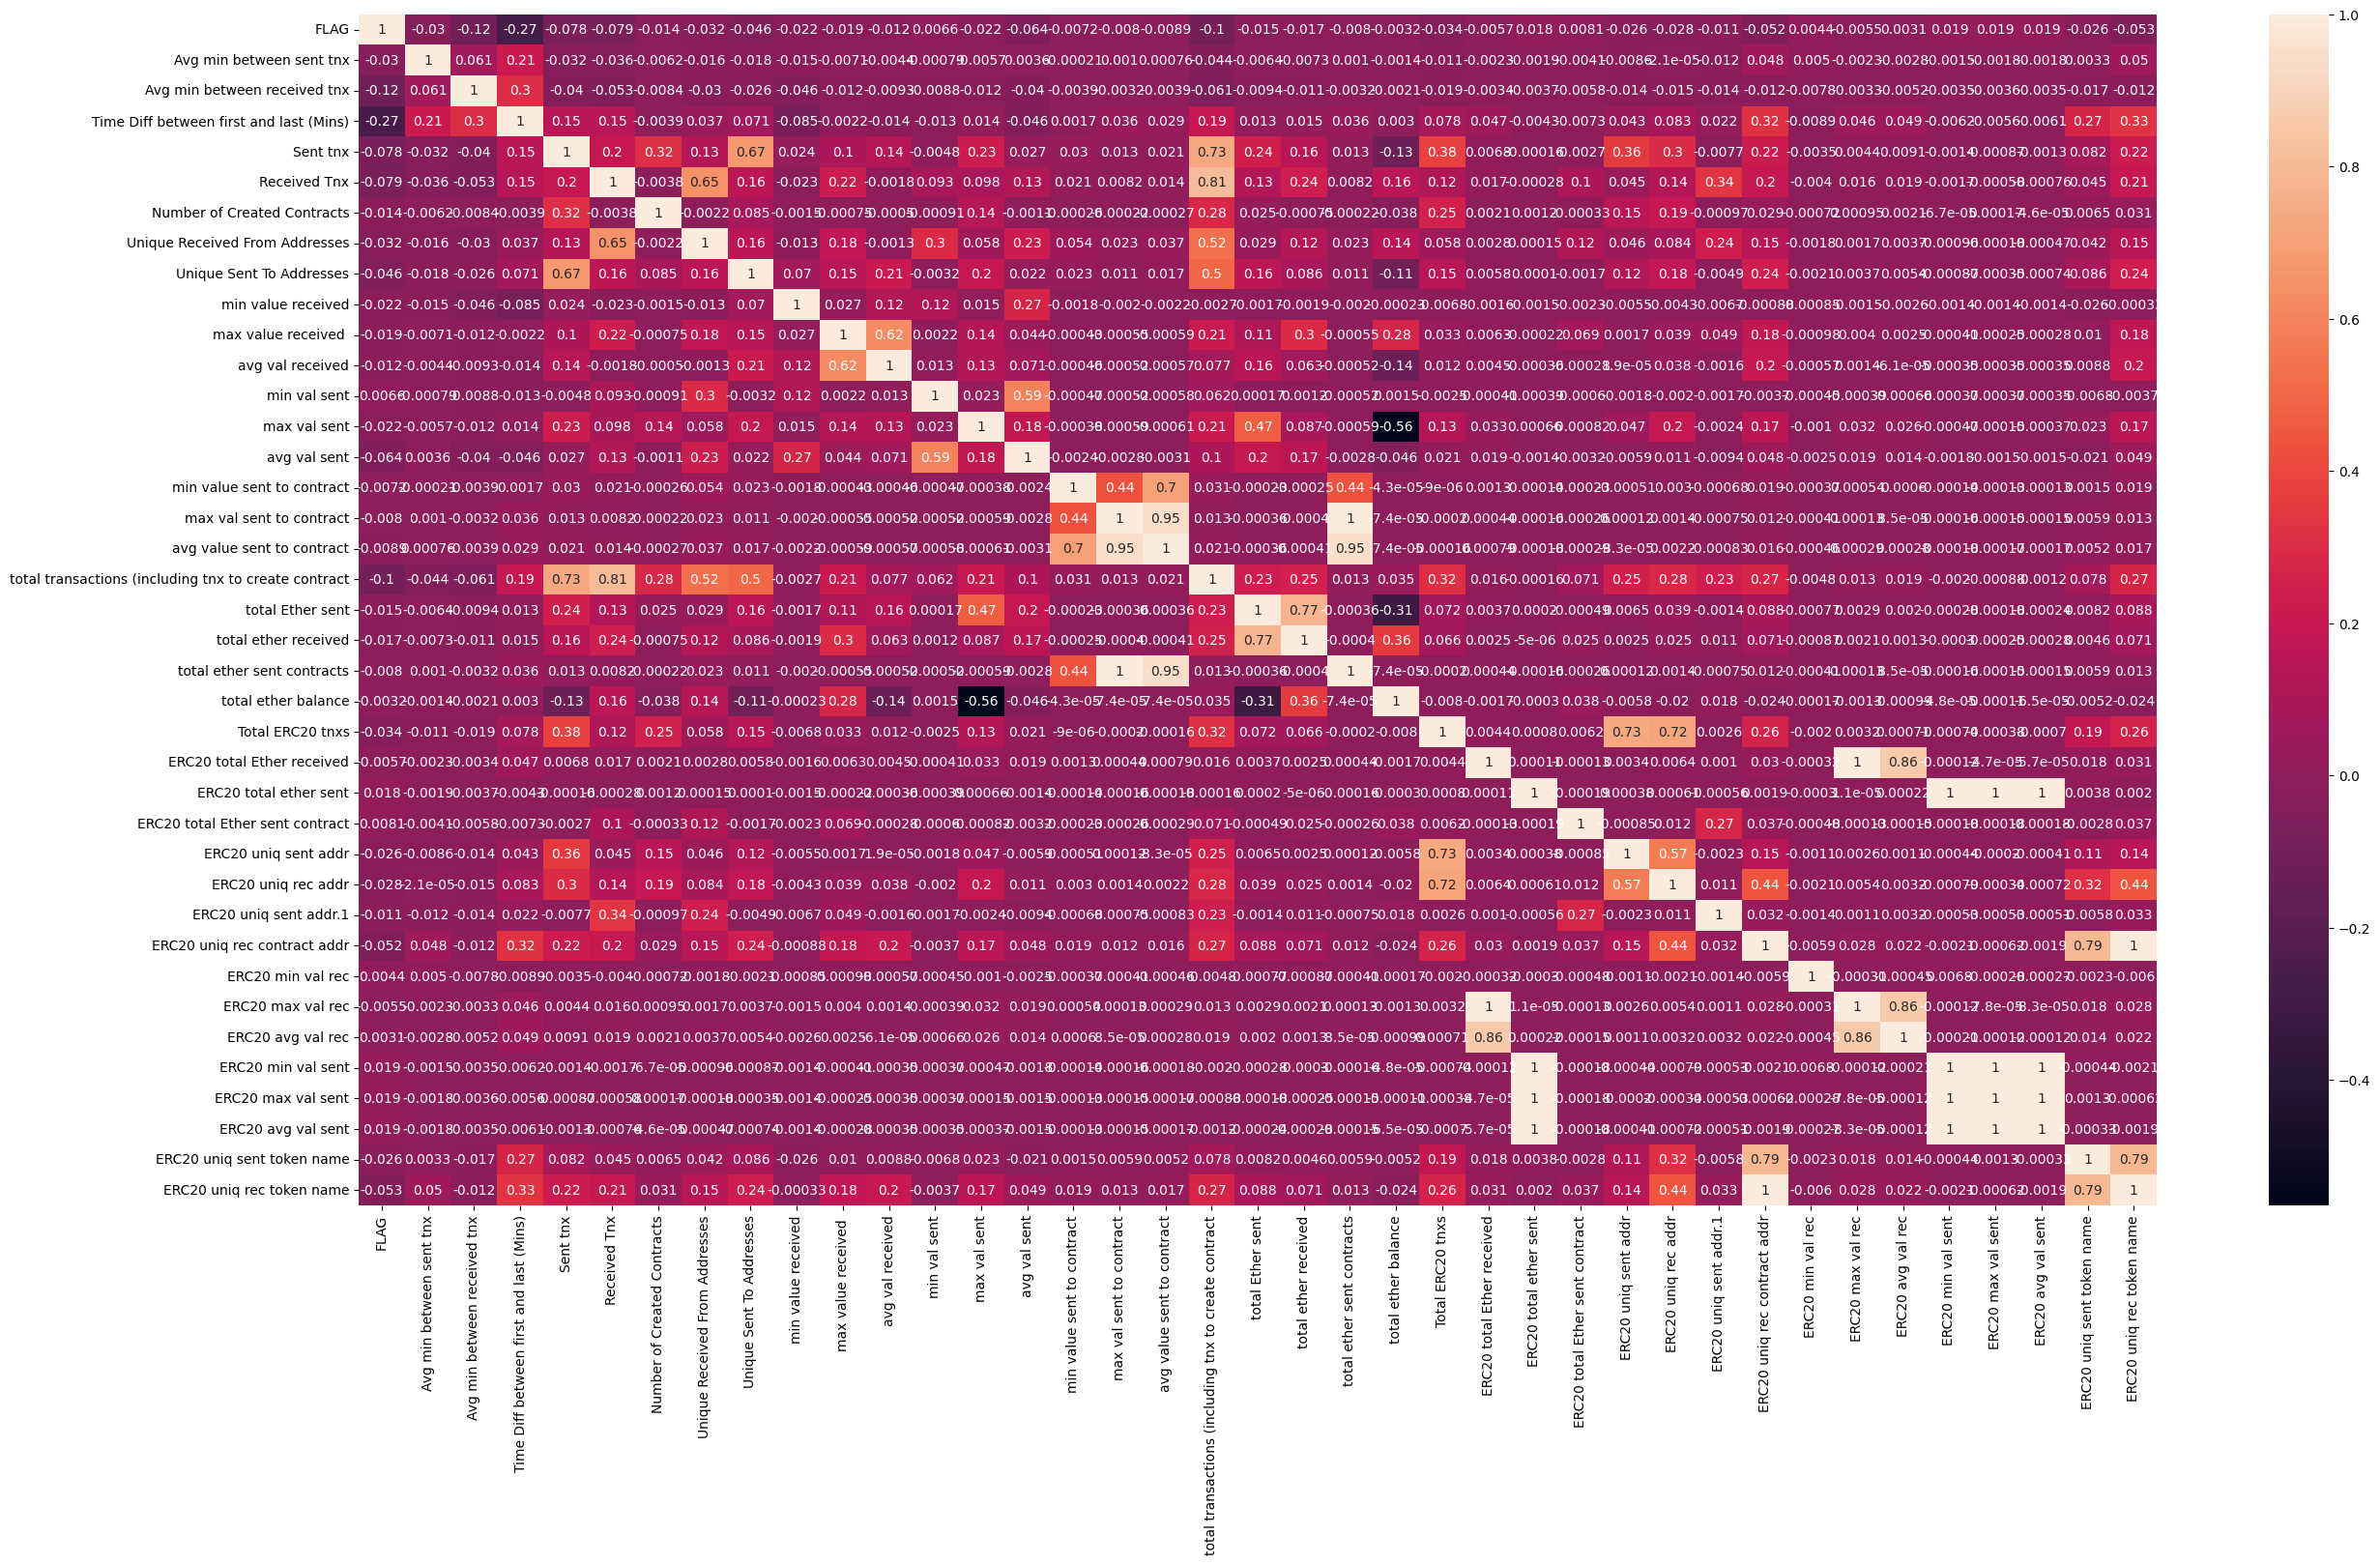

In [21]:
# macierz korelacji
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), annot=True)

In [22]:
# usunięto najbardziej skorelowane kolumny
df = df.drop(['ERC20 total ether sent',
              'max val sent to contract',
              'ERC20 total Ether received',
              'ERC20 min val sent',
              'ERC20 uniq rec contract addr',
              'ERC20 max val sent',
              'avg value sent to contract',
              'ERC20 max val rec',
              'ERC20 uniq sent token name',
              'total transactions (including tnx to create contract'], axis=1)

<Axes: >

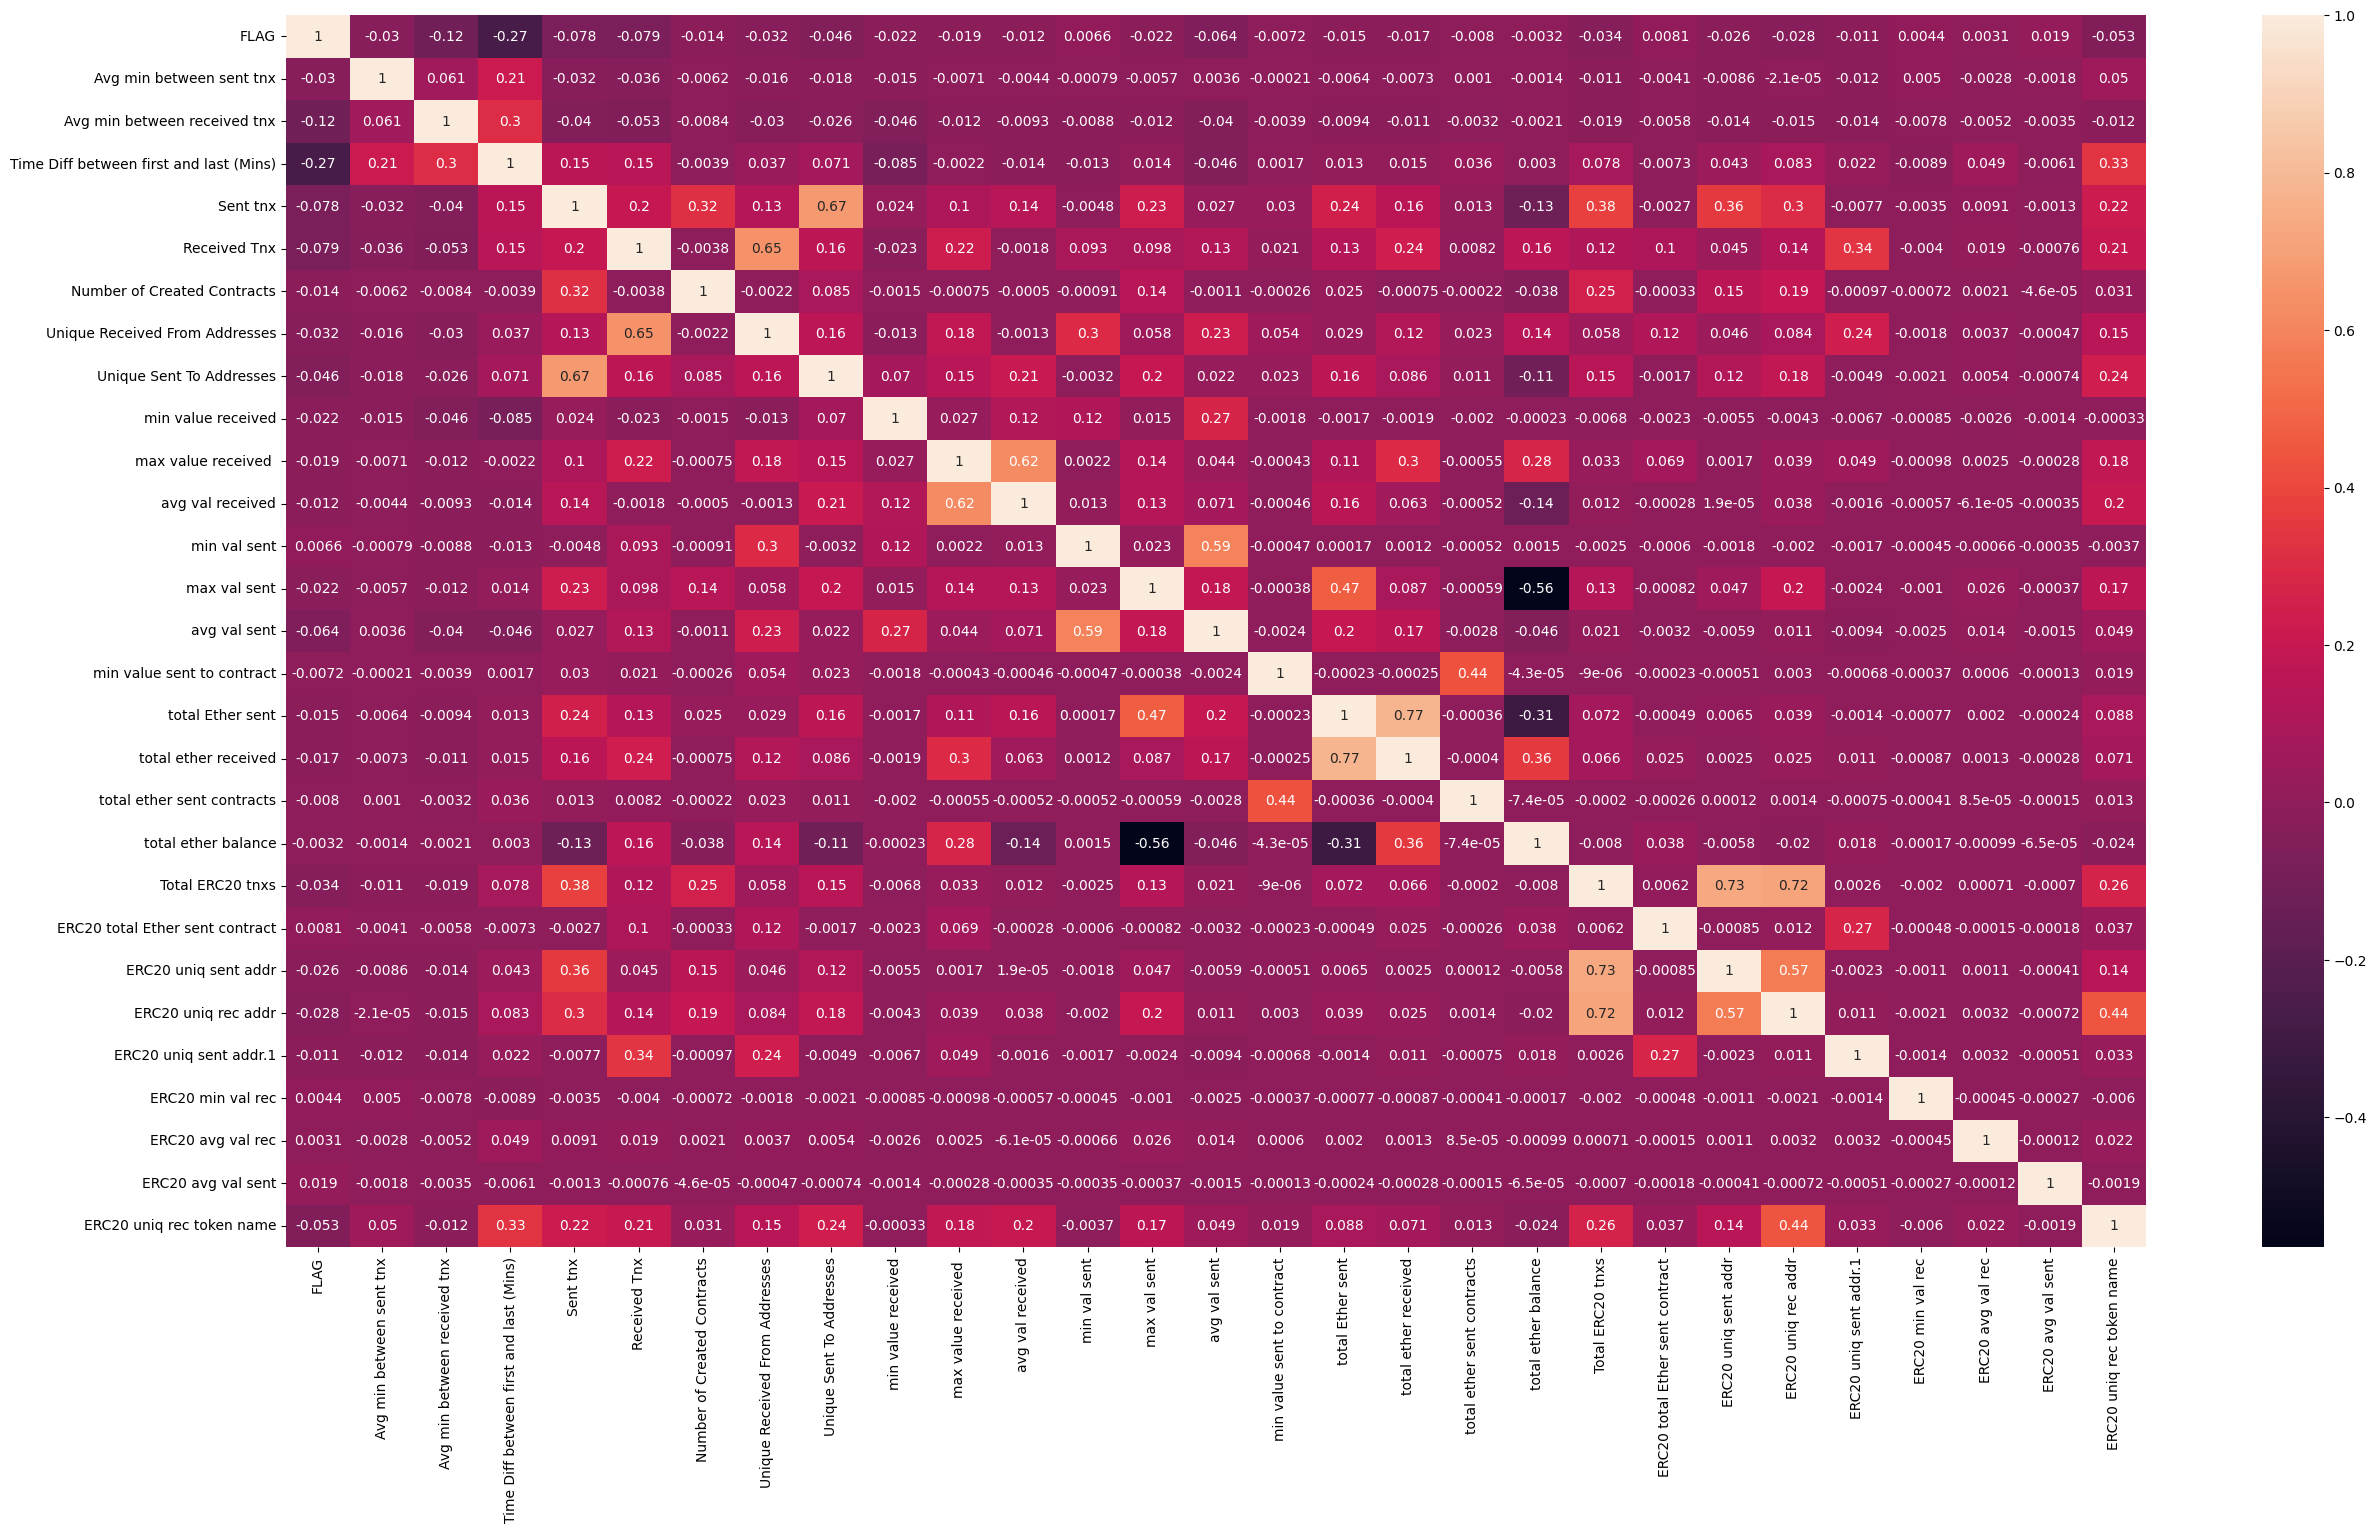

In [23]:
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), annot=True)

In [24]:
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 min val rec,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,865.691093,586.466675,0.0,-279.224419,265.0,0.0,30.0,54.0,0.0,0.00,265586.147600,271779.920000,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,3.087297,3.085478,0.0,-0.001819,8.0,0.0,1.0,5.0,0.0,0.00,57.632615,2.260809,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,3.588616,3.589057,0.0,0.000441,8.0,0.0,0.0,7.0,0.0,0.00,65.189009,0.000000,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,1750.045862,895.399559,0.0,-854.646303,14.0,0.0,2.0,11.0,0.0,0.00,1555.550174,3804.076893,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,104.318883,53.421897,0.0,-50.896986,42.0,0.0,4.0,23.0,0.0,0.00,4934.232147,13726.659220,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,36.665461,36.673777,0.0,0.008316,2.0,0.0,0.0,2.0,0.0,0.00,0.668500,0.000000,2.0
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,13.37,13.370000,0.000000,1.0
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,0.0,61.785995,53.070252,0.0,-8.715743,5.0,0.0,0.0,5.0,0.0,0.00,300.693901,0.000000,5.0
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.0,0.500000,1.0,0.0,0.0,1.0,0.0,0.00,0.000000,0.000000,1.0


In [25]:
# podział na X i y
# podział na zbiór treningowy i testowy

X = df.drop('FLAG', axis=1)
y = df['FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)

(6593, 28)
(3248, 28)


In [26]:
# oversampling

oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
y_train_os.value_counts()

FLAG
0    5135
1    5135
Name: count, dtype: int64

In [27]:
# standaryzacja

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_os)
scaled_X_test = scaler.transform(X_test)

In [28]:
# redukcja wymiarów

pca = PCA(n_components = 20)

X_train_pca = pca.fit_transform(scaled_X_train)
X_test_pca = pca.transform(scaled_X_test)

print(pca.explained_variance_ratio_)

[0.13419477 0.08871418 0.07039433 0.0593678  0.05713839 0.05475738
 0.04856054 0.04232633 0.03902008 0.03784113 0.0370748  0.03704721
 0.03703023 0.03700524 0.03465658 0.0303892  0.02833182 0.02385875
 0.02156002 0.02054071]


In [29]:
# k najbliższych sąsiadów

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_os)
knn_pred = knn.predict(X_test_pca)

In [30]:
print(accuracy_score(y_test, knn_pred))
print(recall_score(y_test, knn_pred))
print(precision_score(y_test, knn_pred))

0.9137931034482759
0.8862690707350902
0.7634408602150538


<Axes: >

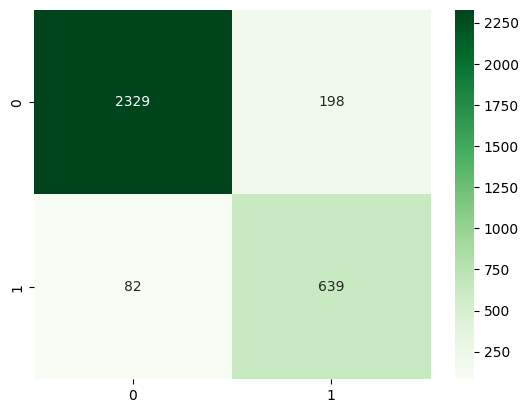

In [31]:
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [32]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2527
           1       0.76      0.89      0.82       721

    accuracy                           0.91      3248
   macro avg       0.86      0.90      0.88      3248
weighted avg       0.92      0.91      0.92      3248



In [33]:
# maszyna wektorów nośnych

svm = SVC()
svm.fit(X_train_pca, y_train_os)
svm_pred = svm.predict(X_test_pca)

In [34]:
print(accuracy_score(y_test, svm_pred))
print(recall_score(y_test, svm_pred))
print(precision_score(y_test, svm_pred))

0.7487684729064039
0.8668515950069348
0.4646840148698885


<Axes: >

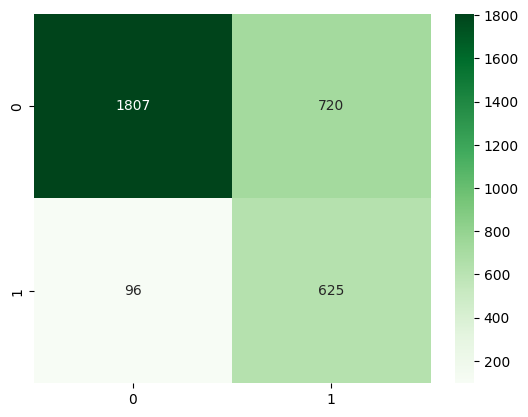

In [35]:
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [36]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      2527
           1       0.46      0.87      0.61       721

    accuracy                           0.75      3248
   macro avg       0.71      0.79      0.71      3248
weighted avg       0.84      0.75      0.77      3248



In [42]:
param_grid = {'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='accuracy')
grid.fit(X_train_pca, y_train_os)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   4.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   4.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.7s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.3s
[CV] END ..................................C=0.1, kernel=rbf; total time=   5.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.2s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   5.9s
[CV] END ..............................C=0.1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring='accuracy', verbose=2)

In [43]:
print(grid.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [44]:
# maszyna wektorów nośnych z parametrami (GridSearchCV)

svm = SVC(C=100, kernel='rbf')
svm.fit(X_train_pca, y_train_os)
svm_pred = svm.predict(X_test_pca)

In [45]:
print(accuracy_score(y_test, svm_pred))
print(recall_score(y_test, svm_pred))
print(precision_score(y_test, svm_pred))

0.8500615763546798
0.869625520110957
0.6147058823529412


<Axes: >

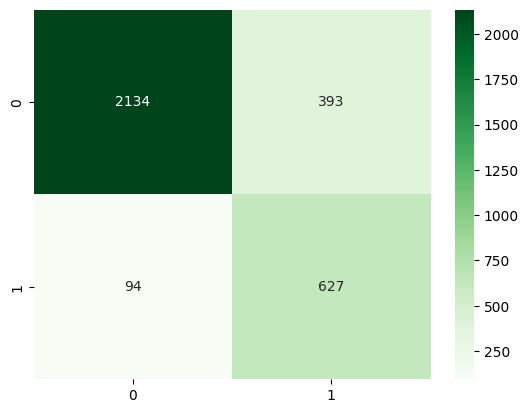

In [46]:
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [51]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2527
           1       0.61      0.87      0.72       721

    accuracy                           0.85      3248
   macro avg       0.79      0.86      0.81      3248
weighted avg       0.88      0.85      0.86      3248



In [47]:
# las losowy

rf = RandomForestClassifier(random_state=7, n_estimators=100)
rf.fit(X_train_pca, y_train_os)
rf_pred = rf.predict(X_test_pca)

In [48]:
print(accuracy_score(y_test, rf_pred))
print(recall_score(y_test, rf_pred))
print(precision_score(y_test, rf_pred))

0.9516625615763546
0.8904299583911235
0.8916666666666667


<Axes: >

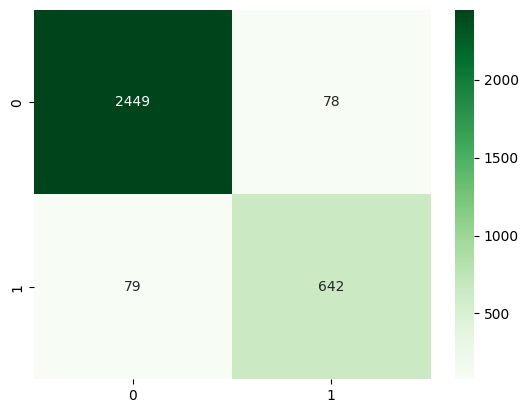

In [49]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [50]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2527
           1       0.89      0.89      0.89       721

    accuracy                           0.95      3248
   macro avg       0.93      0.93      0.93      3248
weighted avg       0.95      0.95      0.95      3248



Z klasyfikacją oszustw najlepiej radzi sobie las losowy. Ma najwyższą, spośród wszystkich modeli, dokładność (95%), a także czułość (89%) i precyzję (89%). Również spoglądając na macierz pomyłek cechuje się największą ilością poprawnie klasyfikowanych klas (szczególnie w przypadku klasyfikowania braku oszustwa - inne modele zdecydowanie częściej klasyfikowały brak oszustwa jako oszustwo).